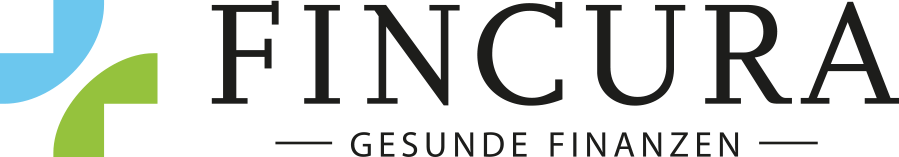

### FINCURA - Gesunde Finanzen 
This company is the Potsdam's only independent financial advisor, they offer better deals than major banks and their agent without commission.

They offer retirement provision plans like
Employer-funded pension, Riester pension,
Rürup pension, etc; Wealth Building plans like investments, construction financing/building savings, fund savings, etc.; financial plans like wealth planning, liquidity planning, Yield Preview, etc; and a whole variety of insurances.



FINCURA is asking for a model to help them classify their clients to find out if they're of low or high risk.




To get the best results in this project there will be a comparison of 5 methods of prediction: Random Forest Classifier, Gradient Boosting Classifier, Perceptron, MLP Classifier and Stochastic Gradient Descent.

## Getting Started
For this models there will be installing the following libraries.

In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342188 sha256=276afc1b2ceaef96c22aab0a3d86088a56b3e1292eee477a50412e6bfeddcb72
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import hdbscan
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Dataset

The dataset they sent has different columns about costumers information.

In [ ]:
df=pd.read_csv("customer_data.csv")
df.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [ ]:
df.isnull().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

The null values have to be deleted

In [ ]:
df=df.dropna()

Define the x and the y variables.

In [ ]:
x= df.drop(["label"],axis=1)
y= df["label"]

print("df: ", df.shape)

df:  (976, 13)
x_train:  (732, 12)
x_test:  (244, 12)
y_train:  (732,)
y_test:  (244,)


### **Clustering**

### K-means
The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)
kmeans.labels_

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,

Next we predict the closest cluster each sample in the diferent columns belongs to

In [ ]:
kmeans.predict(x)

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,

Then we can see in wich parts of the graph are the center of the groups that were clustered.

In [ ]:
kmeans.cluster_centers_

array([[5.89942967e+07, 5.43204578e+00, 1.28512232e+03, 2.35479256e+00,
        1.23743920e+05, 1.91988555e+00, 1.08154506e+01, 4.84406295e+00,
        1.00482117e+02, 4.18311874e+00, 1.62880155e+05, 1.33298430e+02],
       [5.49869748e+07, 5.74007220e+00, 1.28085560e+03, 2.38989170e+00,
        1.29476534e+05, 1.94945848e+00, 1.11841155e+01, 5.03971119e+00,
        1.00075812e+02, 4.26714801e+00, 1.57340412e+05, 1.24293544e+02]])

### HDBSCAN
It's a clusteng algorithm that converts into a hierarchical clustering algorithm, and then using a technique to extract a flat clustering based in the stability of clusters. The goal of this notebook is to give you an overview of how the algorithm works and the motivations behind it

In [ ]:
clusterer = hdbscan.HDBSCAN()
clusterer.fit(x)

HDBSCAN()

In [ ]:
clusterer.labels_

array([ 1,  7, -1, 14, 14, 11,  2,  3, -1, 14,  3, 14,  1, 14, 14,  0, 14,
       14,  0,  3,  3,  2, 14, 15,  7,  3, -1, 14, -1, 14,  2, -1, 14,  1,
        7,  2, 14,  7, 17,  3, 14, 14,  2, 14, -1,  9,  2, -1, -1,  7,  2,
        2,  2,  3, -1, 14,  7,  9,  2,  2,  3, 14, 14,  3, 14,  5, 14,  2,
       14, 17,  6, 10,  7, 15, 15,  8,  2,  2, 13,  7, 14, -1,  3,  2, 14,
       14, 14,  7,  0, 14, 14, 14, 14, -1, -1,  3, 14, 14, 14,  2,  7,  8,
       14,  7, 12, 17, 14, 14,  2, 14,  3, 14,  8, 14, -1, 14, 15,  8, -1,
        8, 15,  4, 14, 14, -1, 14, 14, 15, 14,  2, 14,  8,  2,  1, 10,  2,
       -1,  2,  6,  2, 14,  3,  7, 13,  7, 14,  2, 14,  9, -1, -1, 14, 14,
        1, 14, 15, 14, 15,  9,  3,  1,  3,  2, 14, -1, 15,  3,  2, -1,  7,
       14, -1,  7, 15,  8,  7, -1,  9, 14,  8,  3, 14,  3, -1, 14,  7,  2,
       14, 14, 14, -1,  2, 14,  7, 14, 14,  3,  3,  0,  3, 14,  1,  0,  6,
       -1, 14,  2,  6, 14,  3, 14, -1,  2,  1,  2, -1,  7, 14, 14, -1, 17,
        3,  7, 14, 14,  8

In [ ]:
clusterer.labels_.max()

18

In [ ]:
clusterer.probabilities_

array([1.        , 1.        , 0.        , 1.        , 0.70761533,
       1.        , 1.        , 0.21271669, 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.40529546, 0.99578999,
       0.96809793, 1.        , 1.        , 1.        , 1.        ,
       0.63581359, 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 1.        , 0.95968655,
       1.        , 1.        , 1.        , 0.69982402, 0.81251522,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.93552586, 1.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.91500676, 1.        , 1.        ,
       0.54473781, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.87075204, 0.95278296, 0.99834203, 0.97140873, 1.     

Data Training

In [ ]:
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y)

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (732, 12)
x_test:  (244, 12)
y_train:  (732,)
y_test:  (244,)


### **Methods of Prediction**

In this section it will be tested all the algorithms mentions aboved and will be messuare by the confusion matrix and accuracy of it between the train and tested data; that way the best model can be discover and used.

### Random Forest Classifier
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [ ]:
parameters = {'n_estimators': [100,200,300], 
              'criterion':('gini', 'entropy', 'log_loss'),
              'max_depth':[0,10]}
clf = GridSearchCV(RandomForestClassifier(),parameters)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


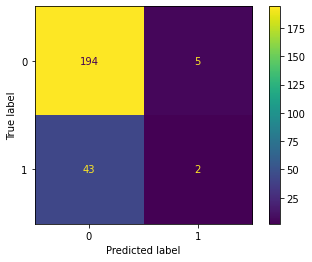

In [ ]:
plot_confusion_matrix(clf, x_test, y_test) 

In [ ]:
accuracy_score(y_test,y_pred)

0.8032786885245902

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       199
           1       0.29      0.04      0.08        45

    accuracy                           0.80       244
   macro avg       0.55      0.51      0.48       244
weighted avg       0.72      0.80      0.74       244



Gradient Boosting Classifier

In [ ]:
parameters = {
    "loss":("log_loss", "deviance", "exponential"),
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "n_estimators":[10]
    }
clf2 = GridSearchCV(GradientBoostingClassifier(),parameters)
clf2.fit(x_train, y_train)
y_pred2 = clf2.predict(x_test)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1290: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared

In [ ]:
confusion_matrix(y_test, y_pred2)

array([[199,   0],
       [ 45,   0]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


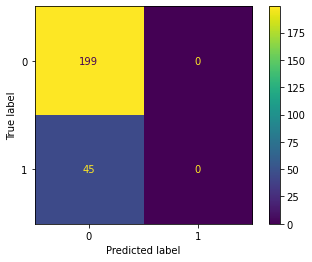

In [ ]:
plot_confusion_matrix(clf2, x_test,y_test) 

In [ ]:
accuracy_score(y_test,y_pred2)

0.8155737704918032

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       199
           1       0.00      0.00      0.00        45

    accuracy                           0.82       244
   macro avg       0.41      0.50      0.45       244
weighted avg       0.67      0.82      0.73       244



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Perceptron
The Perceptron is another simple classification algorithm suitable for large scale learning. By default it does not require a learning rate.
It is not regularized (penalized).
It updates its model only on mistakes.

The last characteristic implies that the Perceptron is slightly faster to train than SGD with the hinge loss and that the resulting models are sparser.

In [ ]:
parameters = {'penalty': ('l2','l1','elasticnet'), 
              'max_iter':[200,2000], 'tol': [0,1],
              'verbose':[0,10]}

In [ ]:
clf3 = GridSearchCV(Perceptron(), parameters)
clf3.fit(x_train, y_train)

-- Epoch 1
Norm: 38702417.92, NNZs: 12, Bias: 1.000000, T: 585, Avg. loss: 535078963390391.125000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 31865908.14, NNZs: 12, Bias: 1.000000, T: 1170, Avg. loss: 515522520227320.250000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 10683864.19, NNZs: 12, Bias: 1.000000, T: 1755, Avg. loss: 513017249826607.250000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 45368653.12, NNZs: 12, Bias: 0.000000, T: 2340, Avg. loss: 501698335229519.187500
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 25597089.69, NNZs: 12, Bias: 0.000000, T: 2925, Avg. loss: 491317235305611.250000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 43837428.31, NNZs: 12, Bias: 0.000000, T: 3510, Avg. loss: 481806400373709.375000
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 28702740.38, NNZs: 12, Bias: 0.000000, T: 4095, Avg. loss: 520416715331570.562500
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 43207917.53, NNZs: 12, Bias: 0.000000, T: 4680

GridSearchCV(estimator=Perceptron(),
             param_grid={'max_iter': [200, 2000],
                         'penalty': ('l2', 'l1', 'elasticnet'), 'tol': [0, 1],
                         'verbose': [0, 10]})

In [ ]:
y_pred3 = clf3.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


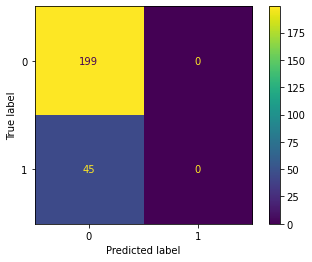

In [ ]:
plot_confusion_matrix(clf3, x_test, y_test) 

In [ ]:
accuracy_score(y_test,y_pred3)

0.8155737704918032

In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       199
           1       0.00      0.00      0.00        45

    accuracy                           0.82       244
   macro avg       0.41      0.50      0.45       244
weighted avg       0.67      0.82      0.73       244



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Multilayer Perceptron
This model trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters.

In [ ]:
parameters = {'hidden_layer_sizes': [100,200,300],
              'activation':('identity', 'logistic', 'tanh', 'relu'),
              'solver': ('lbfgs', 'sgd', 'adam'),
              'max_iter': [100,200,300]}
clf4=GridSearchCV(MLPClassifier(), parameters)
clf4.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iter

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ('identity', 'logistic', 'tanh', 'relu'),
                         'hidden_layer_sizes': [100, 200, 300],
                         'max_iter': [100, 200, 300],
                         'solver': ('lbfgs', 'sgd', 'adam')})

In [ ]:
y_pred4 = clf4.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred4)

array([[199,   0],
       [ 45,   0]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


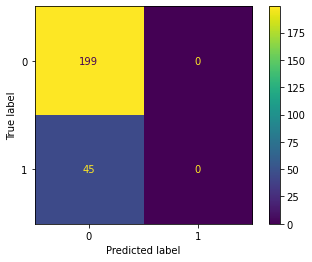

In [ ]:
plot_confusion_matrix(clf4, x_test, y_test) 

In [ ]:
accuracy_score(y_test,y_pred4)

0.8155737704918032

In [ ]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       199
           1       0.00      0.00      0.00        45

    accuracy                           0.82       244
   macro avg       0.41      0.50      0.45       244
weighted avg       0.67      0.82      0.73       244



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Stochastic Gradient Descent
This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule.

In [ ]:
parameters = {'loss': ('hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'), 
              'penalty': ('l2', 'l1', 'elasticnet'), 
              'max_iter': [10,100,1000,10000],
              'alpha': [0.1, 0.001, 0.0001, 0.00005]}
clf5 = GridSearchCV(SGDClassifier(),parameters)
clf5.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.1, 0.001, 0.0001, 5e-05],
                         'loss': ('hinge', 'log_loss', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron',
                                  'squared_error', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'),
                         'max_iter': [10, 100, 1000, 10000],
                         'penalty': ('l2', 'l1', 'elasticnet')})

In [ ]:
y_pred5 = clf5.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred5)

array([[  0, 199],
       [  0,  45]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


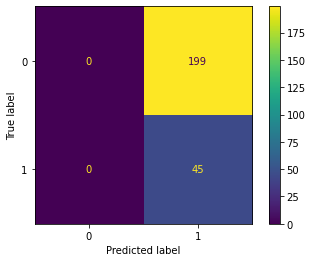

In [ ]:
plot_confusion_matrix(clf5, x_test, y_test) 

In [ ]:
accuracy_score(y_test,y_pred5)

0.18442622950819673

In [ ]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       199
           1       0.18      1.00      0.31        45

    accuracy                           0.18       244
   macro avg       0.09      0.50      0.16       244
weighted avg       0.03      0.18      0.06       244



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Conclusions

The best results of accuracy we can get them from the classifiers 2, 3 and 4, which are the Gradient Boosting Classifier, the MLP Classifier and the Perceptron, all of them got 0.8155 at the accuracy. 
To conclude the company can use one of these 3 models to classify their clients are of low or high risk.

DATASET: https://www.kaggle.com/datasets/praveengovi/credit-risk-classification-dataset/code?select=payment_data.csv